Importing Libraries


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [21]:
data=pd.read_csv(r"..\Notebooks\Energy Consumption data site id 8.csv")
data

,Date,Timestamp,year,Month,Temperature,Holiday,Is_Working_Day,Values
0,2013-03-21,2013-03-21 00:00:00+00:00,2013,3,13.00,Working Day,1,51.953817
1,2013-03-22,2013-03-22 00:00:00+00:00,2013,3,15.00,Working Day,1,42.459353
2,2013-03-23,2013-03-23 00:00:00+00:00,2013,3,15.00,Working Day,1,34.399994
3,2013-03-24,2013-03-24 00:00:00+00:00,2013,3,14.80,Working Day,1,35.669267
4,2013-03-25,2013-03-25 00:00:00+00:00,2013,3,19.00,Working Day,1,52.242278
...,...,...,...,...,...,...,...,...
1441,2017-03-01,2017-03-01 00:00:00+00:00,2017,3,17.00,Working Day,1,31.927374
1442,2017-03-02,2017-03-02 00:00:00+00:00,2017,3,17.00,Working Day,1,30.958712
1443,2017-03-03,2017-03-03 00:00:00+00:00,2017,3,16.00,Working Day,1,31.299375
1444,2017-03-04,2017-03-04 00:00:00+00:00,2017,3,15.75,Working Day,1,17.386416


In [22]:
print("Null values: ")
print(data.isna().sum())
print("Duplicate Values: ")
print(data.duplicated().sum())



Null values: 
Date              0
Timestamp         0
year              0
Month             0
Temperature       0
Holiday           0
Is_Working_Day    0
Values            0
dtype: int64
Duplicate Values: 
0


In [23]:
# Creating new columns such as Day of the year, Day of the week for linear regression

data['Timestamp']=pd.to_datetime(data['Timestamp'])
data['Date']=pd.to_datetime(data['Date'])
# Extract 'Day of the Year'
data['Day of the Year'] = data['Date'].dt.dayofyear

# Extract 'Day of the Week'
data['Day of the Week'] = data['Date'].dt.dayofweek  # Monday=0, Sunday=6

data.head()

,Date,Timestamp,year,Month,Temperature,Holiday,Is_Working_Day,Values,Day of the Year,Day of the Week
0,2013-03-21,2013-03-21 00:00:00+00:00,2013,3,13.0,Working Day,1,51.953817,80,3
1,2013-03-22,2013-03-22 00:00:00+00:00,2013,3,15.0,Working Day,1,42.459353,81,4
2,2013-03-23,2013-03-23 00:00:00+00:00,2013,3,15.0,Working Day,1,34.399994,82,5
3,2013-03-24,2013-03-24 00:00:00+00:00,2013,3,14.8,Working Day,1,35.669267,83,6
4,2013-03-25,2013-03-25 00:00:00+00:00,2013,3,19.0,Working Day,1,52.242278,84,0


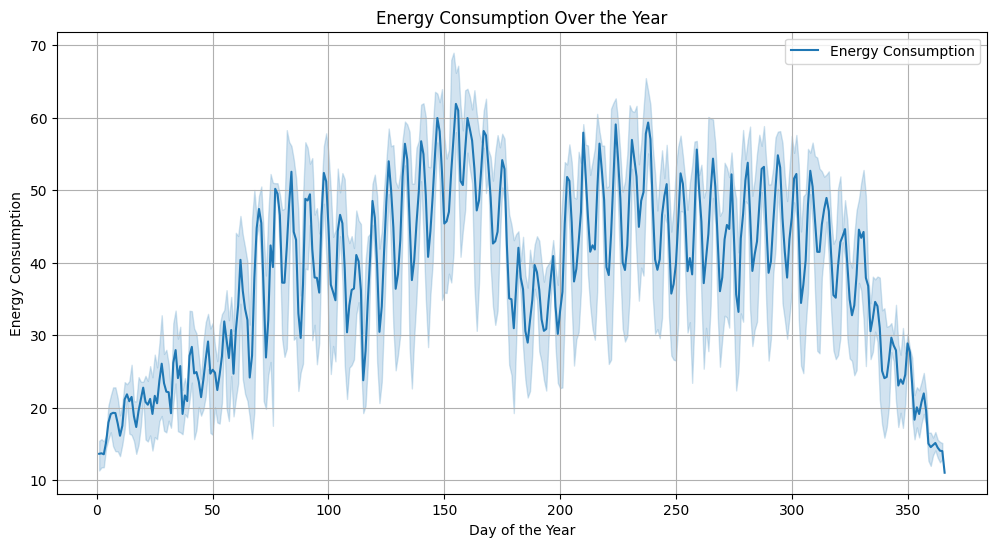

In [24]:
# Create the plot for Day of the Year
plt.figure(figsize=(12, 6))
sns.lineplot(x='Day of the Year', y='Values', data=data, label='Energy Consumption')

# Adding labels and title
plt.xlabel('Day of the Year')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption Over the Year')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
X=data.drop(columns=['Values','Holiday','Date','Timestamp'])
y=data['Values']

print('Shape of Features: ',X.shape)
print("Shape  of target:", y.shape)
print(X)
print(y)

Shape of Features:  (1446, 6)
Shape  of target: (1446,)
      year  Month  Temperature  Is_Working_Day  Day of the Year  \
0     2013      3        13.00               1               80   
1     2013      3        15.00               1               81   
2     2013      3        15.00               1               82   
3     2013      3        14.80               1               83   
4     2013      3        19.00               1               84   
...    ...    ...          ...             ...              ...   
1441  2017      3        17.00               1               60   
1442  2017      3        17.00               1               61   
1443  2017      3        16.00               1               62   
1444  2017      3        15.75               1               63   
1445  2017      3        15.40               1               64   

      Day of the Week  
0                   3  
1                   4  
2                   5  
3                   6  
4                  

In [26]:
## train test splitting

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X Train:",X_train.shape)
print("Shape of y train:",y_train.shape)
print("Shape of X Test:", X_test.shape)
print("Shape of y Test:",y_test.shape)

Shape of X Train: (1012, 6)
Shape of y train: (1012,)
Shape of X Test: (434, 6)
Shape of y Test: (434,)


In [27]:
#Standard Scaling 

Standard_scaler=StandardScaler()

X_train_scaled=Standard_scaler.fit_transform(X_train)
X_test_scaled=Standard_scaler.fit_transform(X_test)


In [28]:
#Train the Linear Model

model=LinearRegression()

model.fit(X_train_scaled,y_train)

LinearRegression()

In [29]:
y_pred=model.predict(X_test_scaled)

In [30]:
#Evaluating the model

mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error : ",mse)

mae=mean_absolute_error(y_test,y_pred)
print("mean Abasolute Error : ",mae)

r2_ = r2_score(y_test,y_pred)
print("R2 Score : ",r2_ )

# Calculate the Adjusted R-squared value
n = X_test.shape[0]  # Number of observations
p = X_test.shape[1]  # Number of predictors
r2_adj = 1 - (1 - r2_) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {r2_adj}")

Mean Squared Error :  113.2511315862554
mean Abasolute Error :  8.683884109790906
R2 Score :  0.4709436467011524
Adjusted R-squared: 0.46350959958219906


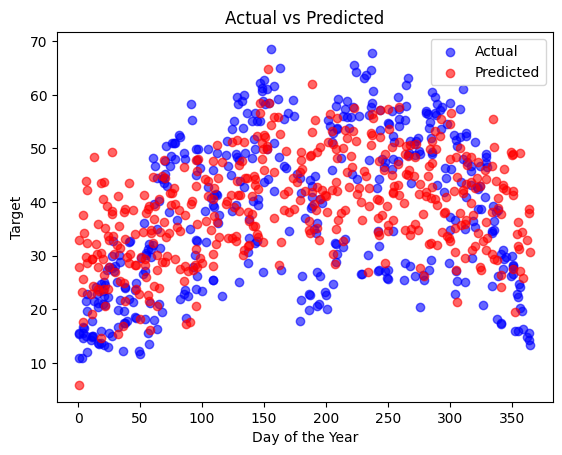

In [32]:
# Plotting actual vs predicted values (only for simple linear regression or a single feature)
# Scatter plot for actual values
plt.scatter(X_test['Day of the Year'], y_test, color='blue', label='Actual', alpha=0.6)

# Scatter plot for predicted values
plt.scatter(X_test['Day of the Year'], y_pred, color='red', label='Predicted', alpha=0.6)

plt.xlabel('Day of the Year')
plt.ylabel('Target')  # Replace with your actual target column name
plt.title('Actual vs Predicted')
plt.legend()
plt.show()



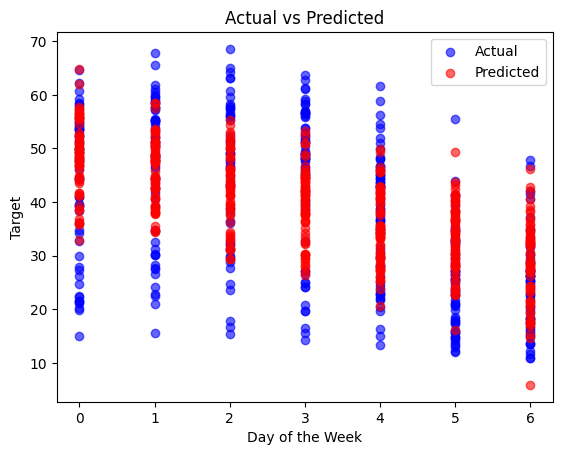

In [33]:
plt.scatter(X_test['Day of the Week'], y_test, color='blue', label='Actual', alpha=0.6)

# Scatter plot for predicted values
plt.scatter(X_test['Day of the Week'], y_pred, color='red', label='Predicted', alpha=0.6)

plt.xlabel('Day of the Week')
plt.ylabel('Target')  # Replace with your actual target column name
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

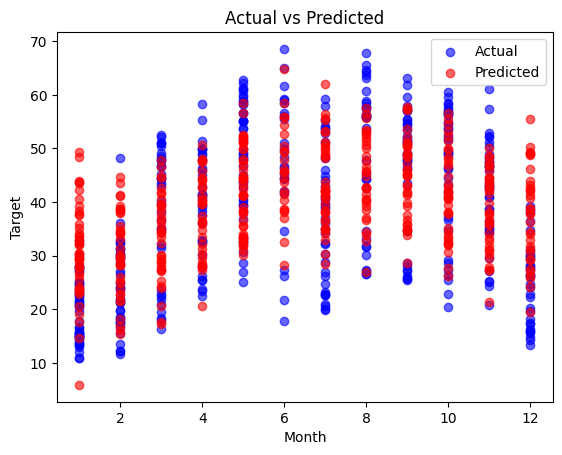

In [34]:
plt.scatter(X_test['Month'], y_test, color='blue', label='Actual', alpha=0.6)

# Scatter plot for predicted values
plt.scatter(X_test['Month'], y_pred, color='red', label='Predicted', alpha=0.6)

plt.xlabel('Month')
plt.ylabel('Target')  # Replace with your actual target column name
plt.title('Actual vs Predicted')
plt.legend()
plt.show()